In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBClassifier


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
# Importing the dataset
dataset = pd.read_excel(r'D:\machine learning\supermarket_sales.xlsx')

In [4]:
dataset.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-05-01 00:00:00,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-08-03 00:00:00,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03 00:00:00,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-08-02 00:00:00,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:

# Checking for null values
dataset.isnull().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [6]:

# Checking for duplicates
dataset.duplicated().sum()

0

<AxesSubplot:>

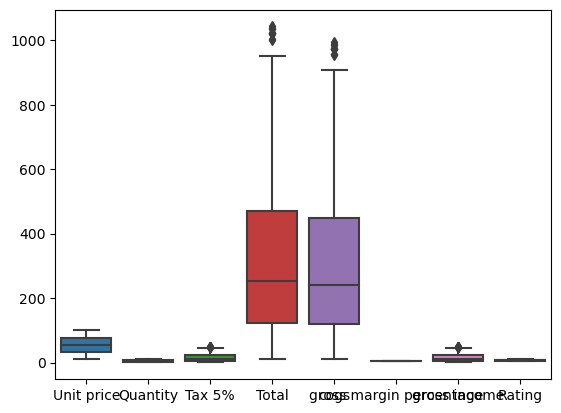

In [7]:

# Checking for outliers
sns.boxplot(data=dataset)

In [8]:

# Removing outliers
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset = dataset[~((dataset < (Q1 - 1.5 * IQR)) |(dataset > (Q3 + 1.5 * IQR))).any(axis=1)]



<AxesSubplot:>

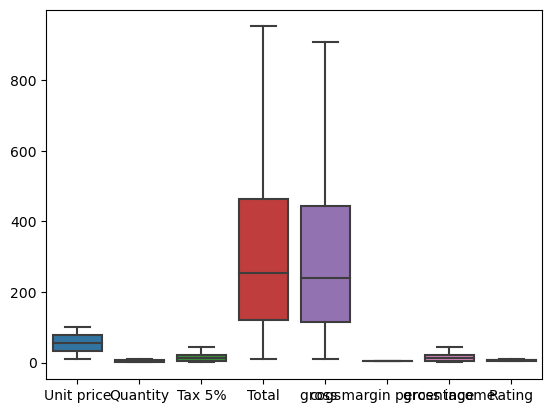

In [9]:

# Checking for outliers
sns.boxplot(data=dataset)

## performing EDA

In [10]:
dataset.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,991.000000,991.000000,991.000000,991.000000,991.000000,9.910000e+02,991.000000,991.000000
mean,55.292482,5.469223,15.076417,316.604752,301.528335,4.761905e+00,15.076417,6.979717
std,26.311619,2.905031,11.319504,237.709589,226.390085,6.131525e-14,11.319504,1.716957
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,32.665000,3.000000,5.817500,122.167500,116.350000,4.761905e+00,5.817500,5.500000
50%,54.840000,5.000000,12.036000,252.756000,240.720000,4.761905e+00,12.036000,7.000000
75%,77.485000,8.000000,22.127000,464.667000,442.540000,4.761905e+00,22.127000,8.500000
max,99.960000,10.000000,45.325000,951.825000,906.500000,4.761905e+00,45.325000,10.000000


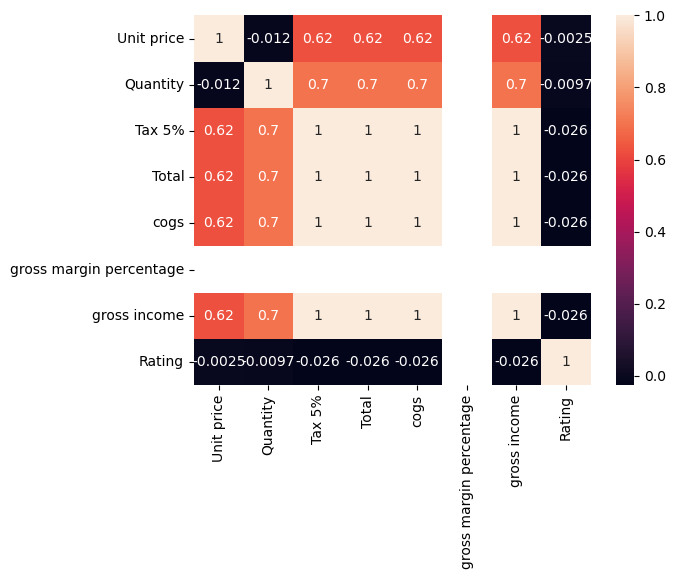

In [11]:
# Checking for correlation
sns.heatmap(dataset.corr(), annot=True)
# check for skewness of each numeric feature
skewness = dataset.select_dtypes(include=np.number).skew()


In [12]:
# Checking for skewness
print("Skewness of each numeric feature:")
print(skewness)

Skewness of each numeric feature:
Unit price                 0.014036
Quantity                   0.021873
Tax 5%                     0.843948
Total                      0.843948
cogs                       0.843948
gross margin percentage    0.000000
gross income               0.843948
Rating                     0.005938
dtype: float64


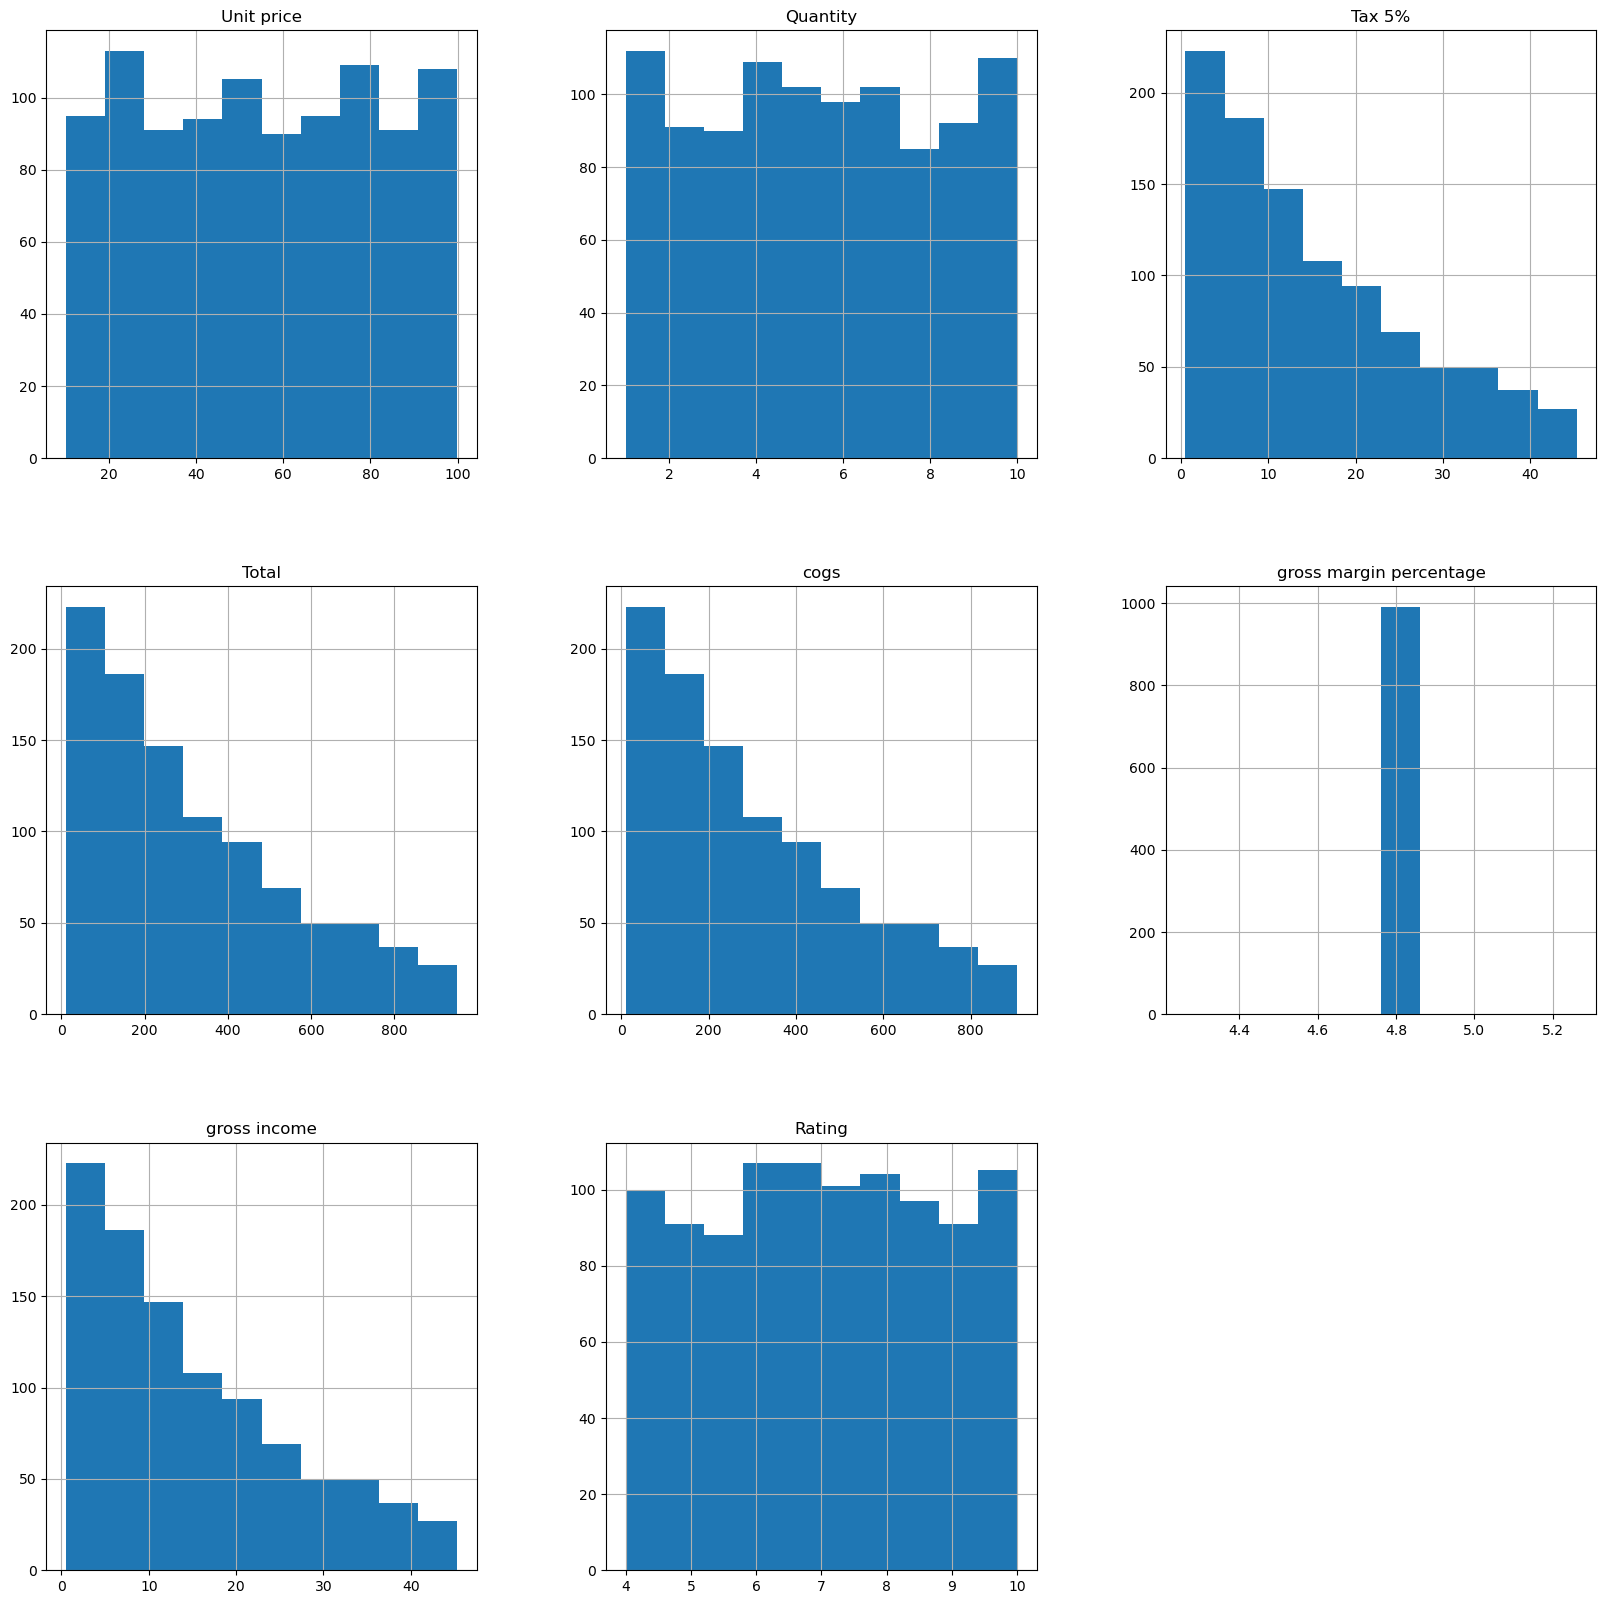

In [13]:

# Checking for distribution
dataset.hist(figsize=(20,20))
# labels
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Distribution of Features')
plt.show()

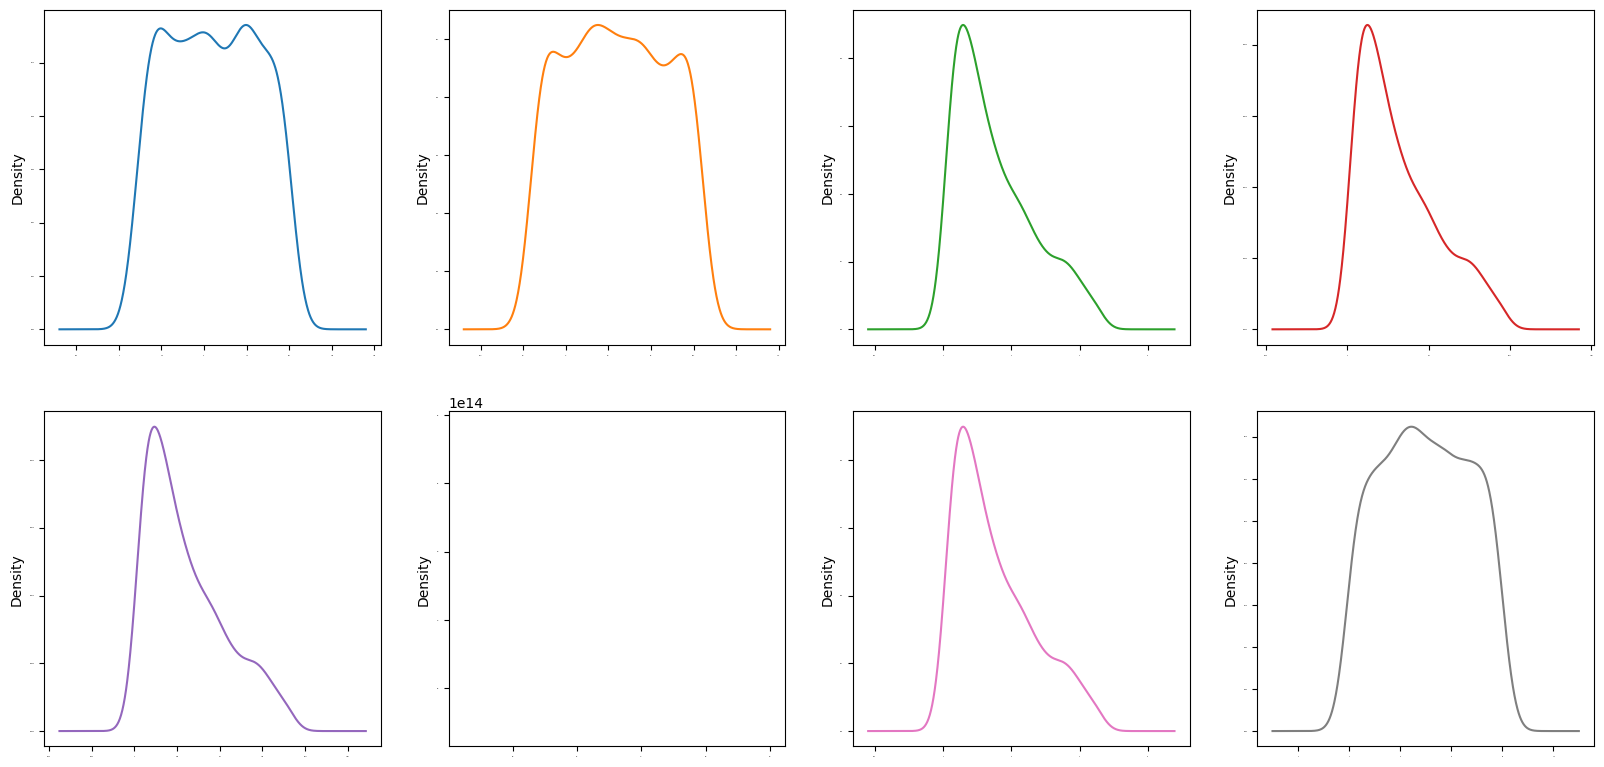

In [14]:

# Checking for distribution
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=False, fontsize=1, figsize=(20,20))
# labels
plt.xlabel('Features')
plt.ylabel('Frequency')
plt.title('Distribution of Features')
plt.show()

In [15]:
# Select only numerical columns
numerical_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()


In [16]:
# Scale the numerical columns
scaler = MinMaxScaler()
dataset_scaled = scaler.fit_transform(dataset[numerical_cols])

In [17]:
# Create a new dataframe with the scaled values
dataset_scaled = pd.DataFrame(dataset_scaled, columns=numerical_cols)


In [18]:
# Concatenate the scaled numerical columns with the non-numerical columns
dataset = pd.concat([dataset_scaled, dataset.select_dtypes(exclude=[np.number])], axis=1)

Implement Feature Scaling to Normalize the data(compare the histogram/KDE for MinMaxScaler
and StandardScaler). Choose one of the Scaler to proceed ahead and provide reasoning as to
why it was selected?

In [19]:

# Select only numerical columns
numerical_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()



In [20]:
# Scale the numerical columns
scaler = MinMaxScaler()
dataset[numerical_cols] = scaler.fit_transform(dataset[numerical_cols])


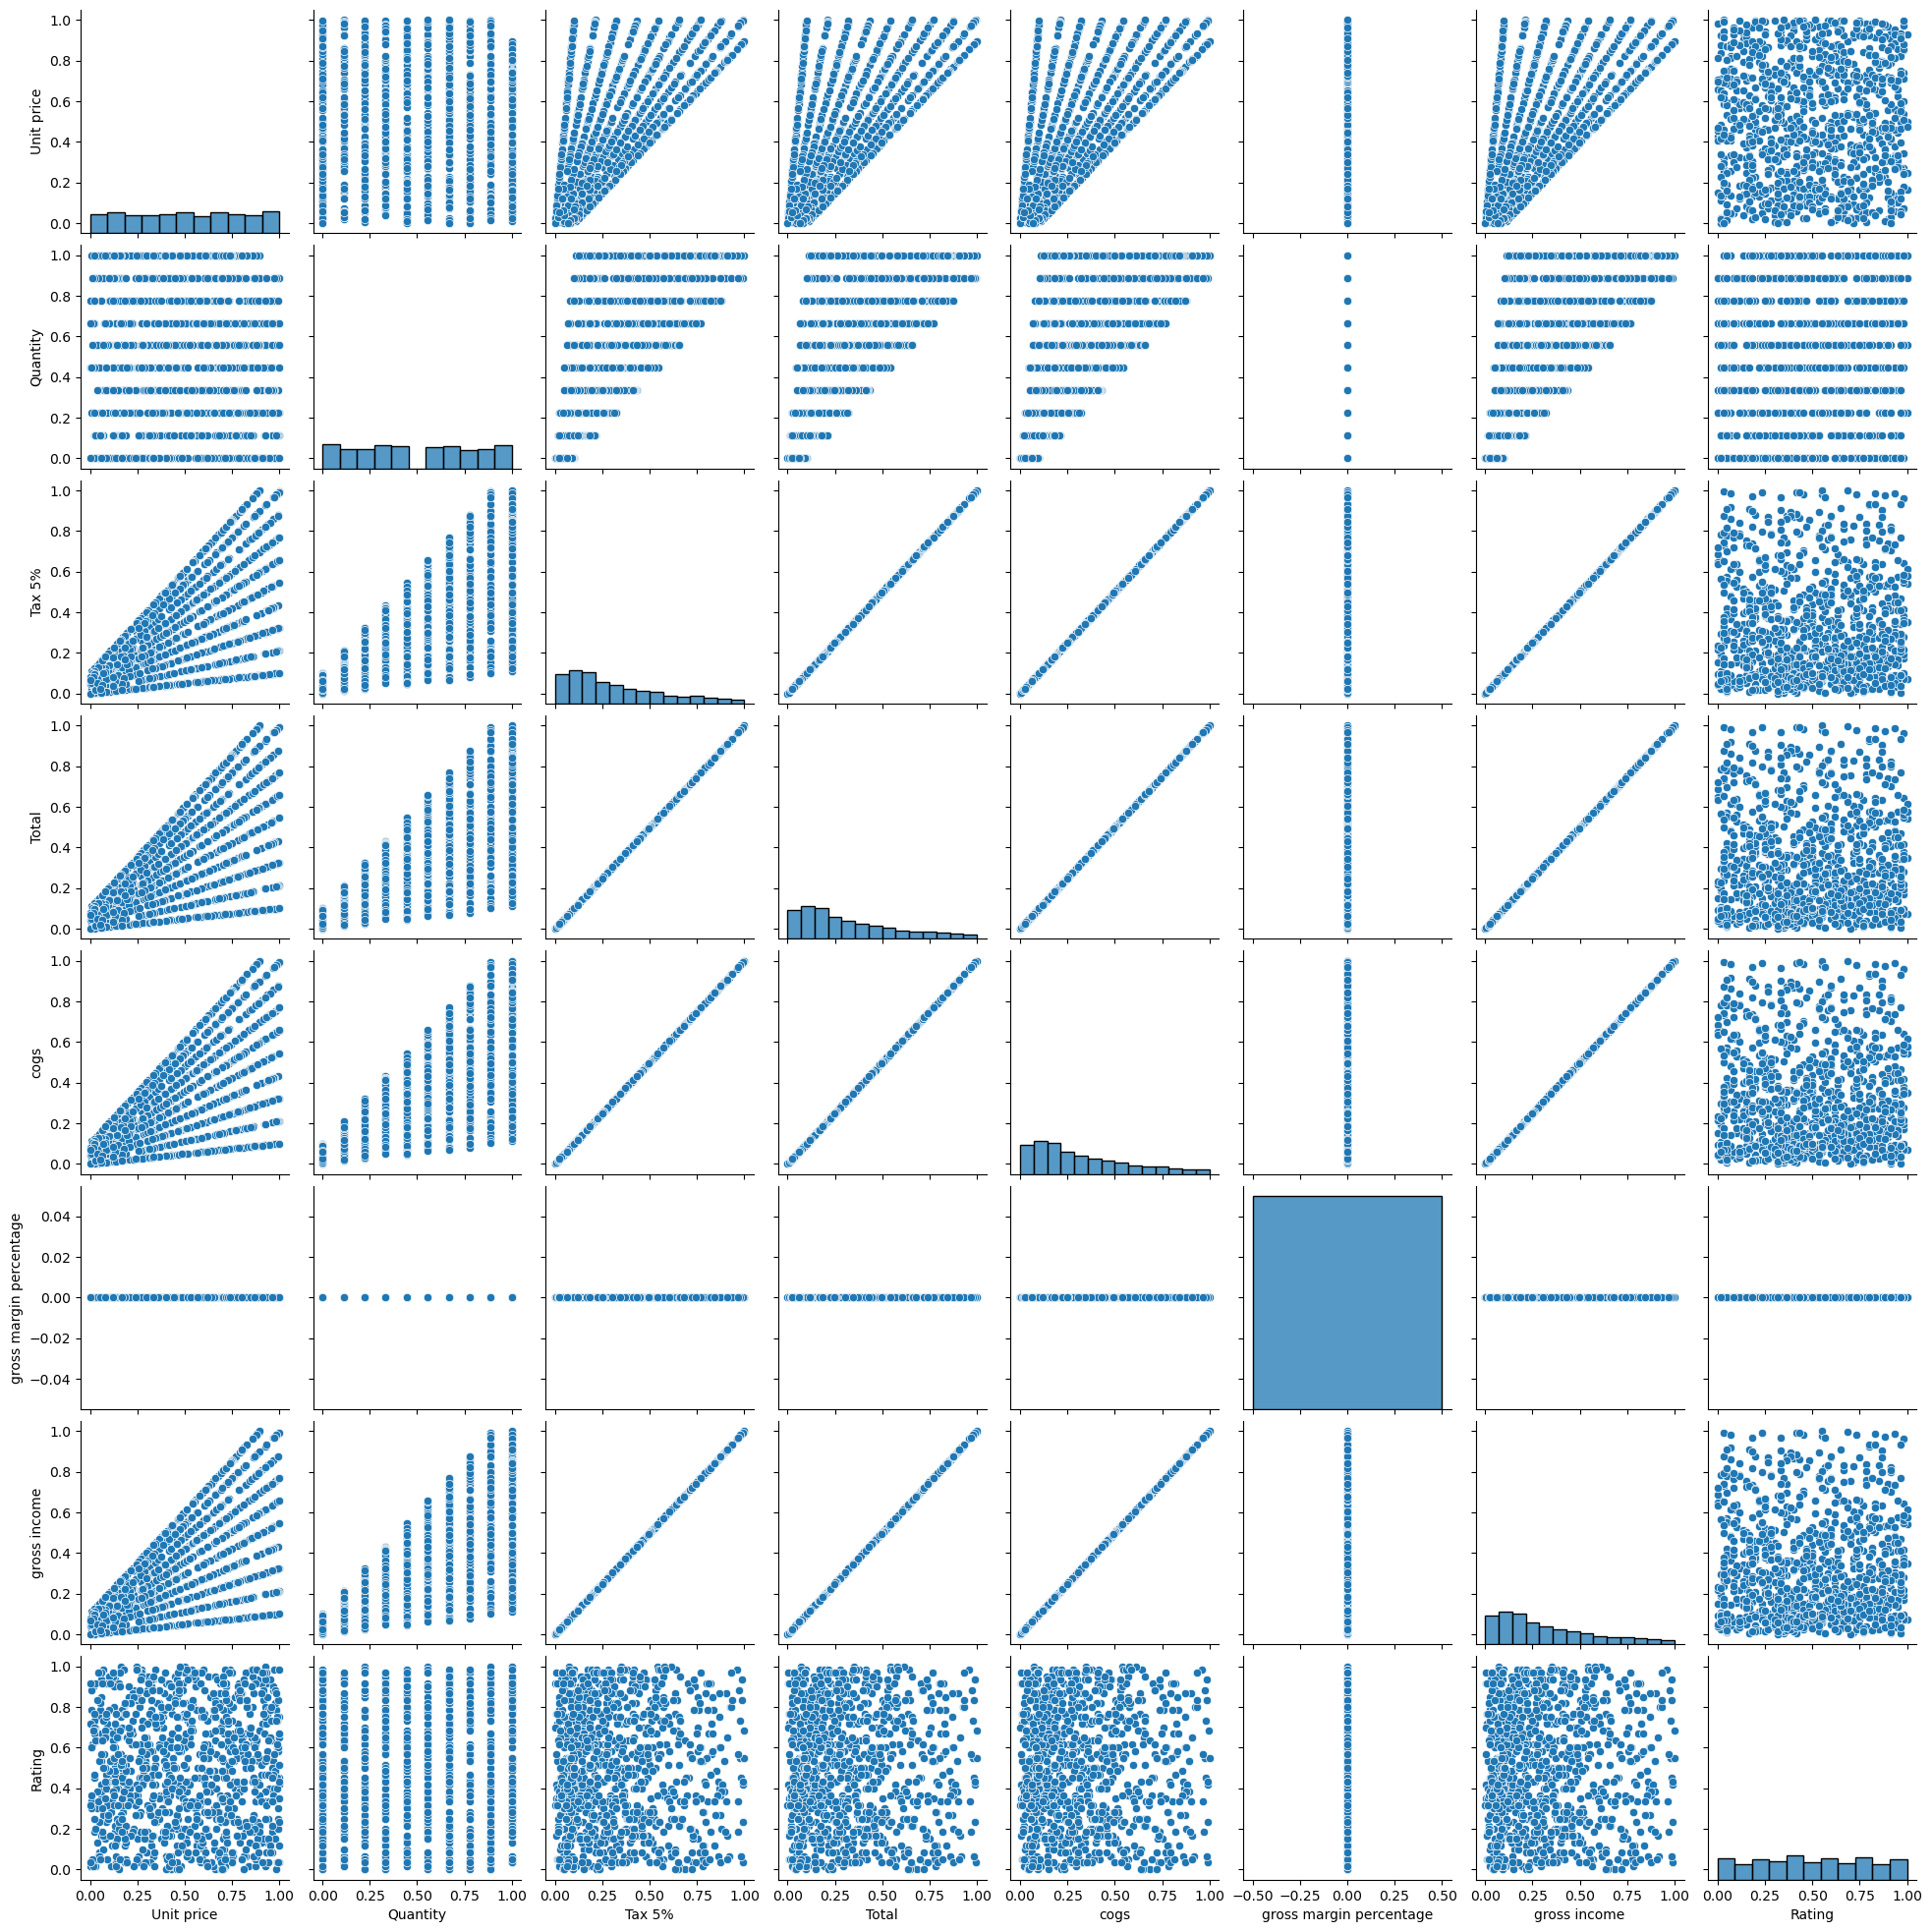

In [21]:
# Create pairplot of all numerical features
sns.pairplot(dataset[numerical_cols])
plt.show()

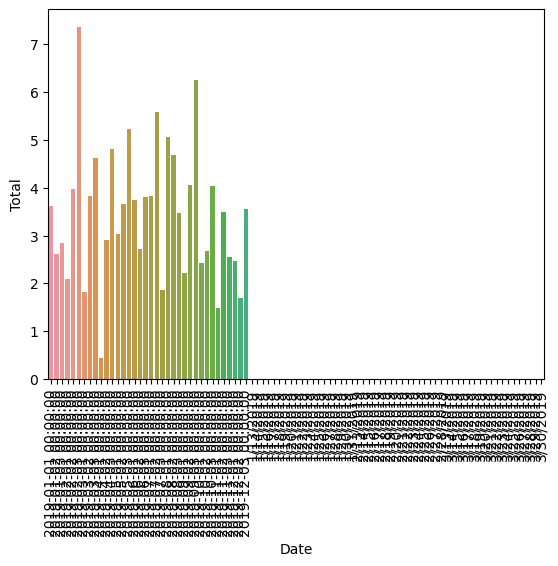

In [22]:
# Create bar chart of total sales by date
total_sales_by_date = dataset.groupby('Date')['Total'].sum().reset_index()
sns.barplot(x='Date', y='Total', data=total_sales_by_date)
plt.xticks(rotation=90)
plt.show()


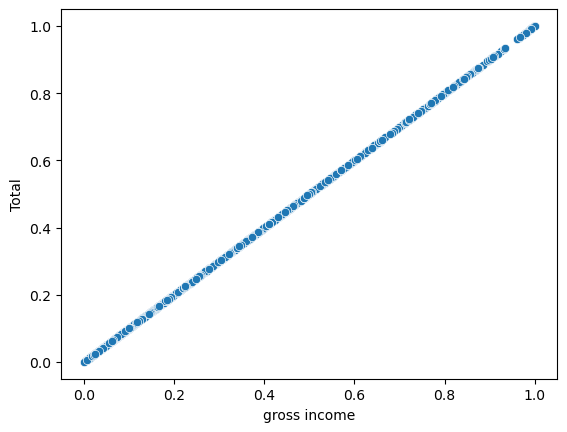

In [25]:
# Create scatter plot of gross income vs. total sales
sns.scatterplot(x='gross income', y='Total', data=dataset)
plt.show()